In [2]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from model_tools import load_dataset, load_valset
import time

In [3]:

import matplotlib.pyplot as plt

In [4]:
Model_Name = 'full_conv4_2'

In [5]:
trained_model = keras.models.load_model('saved_model/'+Model_Name)

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [6]:
val_ds = load_valset('val_image',10)
test_ds = load_dataset('test_image',10)

In [7]:
img_batch, mask_batch = list(val_ds.take(1).as_numpy_iterator())[0]
print(img_batch.shape)
print(mask_batch.shape)

(32, 200, 200, 3)
(32, 100, 100)


In [8]:
st = time.time()
predict_batch = trained_model(img_batch)
print('took:{}'.format(time.time()-st))

took:1.475156545639038


In [9]:
print(predict_batch.shape)

(32, 100, 100)


In [10]:
import numpy as np

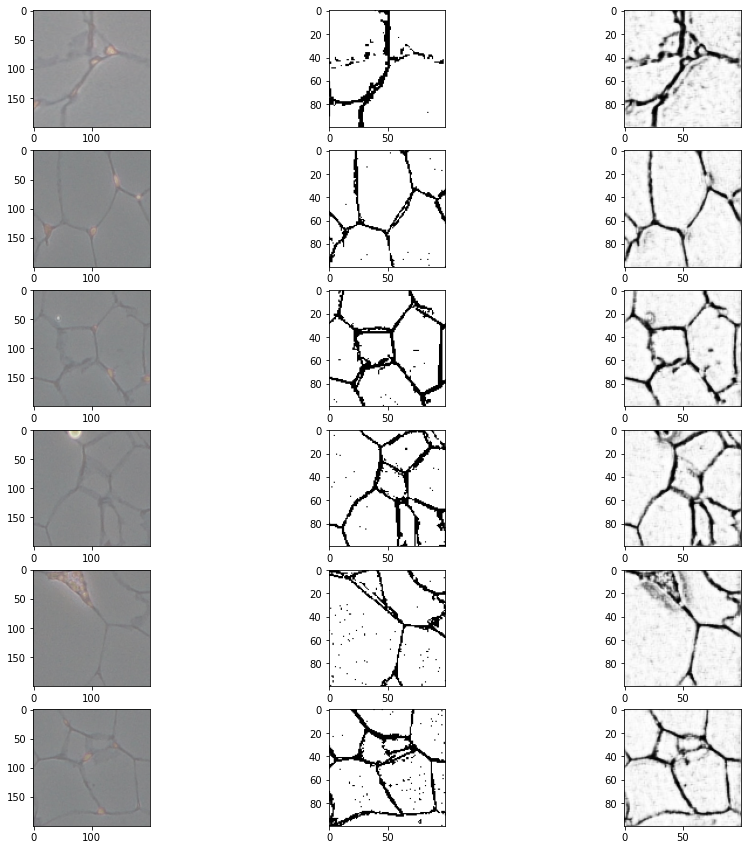

In [11]:
fig = plt.figure(figsize=(15,15))
i = 1
n = 6
for img, mask, pred in zip(img_batch[:n],mask_batch[:n],predict_batch[:n]):
    ax = fig.add_subplot(n,3,i)
    ax.imshow(img)
    ax = fig.add_subplot(n,3,i+1)
    ax.imshow(mask, cmap='binary')
    ax = fig.add_subplot(n,3,i+2)
    ax.imshow(pred, cmap='binary')
    i += 3
plt.show()

In [12]:
print(predict_batch[0][0])
print(np.min(predict_batch[0]))
print(np.max(predict_batch[0]))

tf.Tensor(
[0.11858907 0.08419105 0.11818135 0.11357957 0.08240148 0.08314294
 0.09912083 0.14306796 0.14104459 0.11008787 0.08195955 0.08509901
 0.07793769 0.08570924 0.09122002 0.06536579 0.0546006  0.06019703
 0.06221694 0.04646465 0.09009299 0.1145665  0.10266399 0.14854059
 0.10687688 0.12678516 0.11027935 0.05541271 0.06441769 0.04940522
 0.05520868 0.07120273 0.07356304 0.04831609 0.04501554 0.05213425
 0.04922208 0.0764077  0.14475226 0.23899394 0.3644382  0.6746938
 0.8951566  0.9569571  0.8908652  0.6846858  0.39192948 0.42339844
 0.6772606  0.89606965 0.89010334 0.5874107  0.24889916 0.08756378
 0.09041366 0.10248417 0.15443972 0.13184243 0.09484524 0.06941545
 0.05531061 0.04849598 0.05644402 0.07436571 0.07558477 0.10951516
 0.11696559 0.10484338 0.09585607 0.07396334 0.08093667 0.08079153
 0.07517642 0.10706347 0.10970581 0.09041366 0.11797798 0.11357957
 0.09585607 0.07544839 0.0826973  0.08740792 0.08509901 0.07779741
 0.06791663 0.08021325 0.08449274 0.06941545 0.09947

In [13]:
print(img_batch[0][0])
print(np.min(img_batch[0]))
print(np.max(img_batch[0]))

[[0.58431375 0.5921569  0.59607846]
 [0.58431375 0.59607846 0.6       ]
 [0.5882353  0.6        0.6039216 ]
 [0.59607846 0.6039216  0.6117647 ]
 [0.6        0.6039216  0.6117647 ]
 [0.5882353  0.5921569  0.6039216 ]
 [0.5921569  0.6        0.60784316]
 [0.59607846 0.6        0.60784316]
 [0.5921569  0.59607846 0.6039216 ]
 [0.5803922  0.58431375 0.5921569 ]
 [0.5803922  0.58431375 0.5921569 ]
 [0.58431375 0.5882353  0.59607846]
 [0.5803922  0.58431375 0.5921569 ]
 [0.5686275  0.57254905 0.5803922 ]
 [0.5803922  0.58431375 0.59607846]
 [0.5803922  0.58431375 0.59607846]
 [0.5803922  0.58431375 0.59607846]
 [0.5764706  0.5803922  0.6       ]
 [0.5803922  0.58431375 0.6       ]
 [0.58431375 0.5882353  0.6039216 ]
 [0.58431375 0.5882353  0.6039216 ]
 [0.58431375 0.5882353  0.6039216 ]
 [0.5803922  0.58431375 0.6       ]
 [0.5764706  0.5803922  0.59607846]
 [0.5764706  0.5764706  0.5882353 ]
 [0.5764706  0.57254905 0.58431375]
 [0.5803922  0.5764706  0.58431375]
 [0.58431375 0.5803922  0.58